In [ ]:
# https://machinelearningmastery.com/xgboost-python-mini-course/
# https://xgboost.readthedocs.io/en/latest/index.html

# First XGBoost model for Pima Indians dataset
import pandas as pd
import numpy as np
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


##Diabets dataset

In [ ]:
df = pd.read_csv('diabetes.csv')

# df = df.drop('Insulin', axis=1)
# df.describe()

In [ ]:
#df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# split data into X and y
X = np.array(df.iloc[:,0:8])
Y = np.array(df.iloc[:,8])

# X = np.array(df.iloc[:,0:7])
# Y = np.array(df.iloc[:,7])

In [ ]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


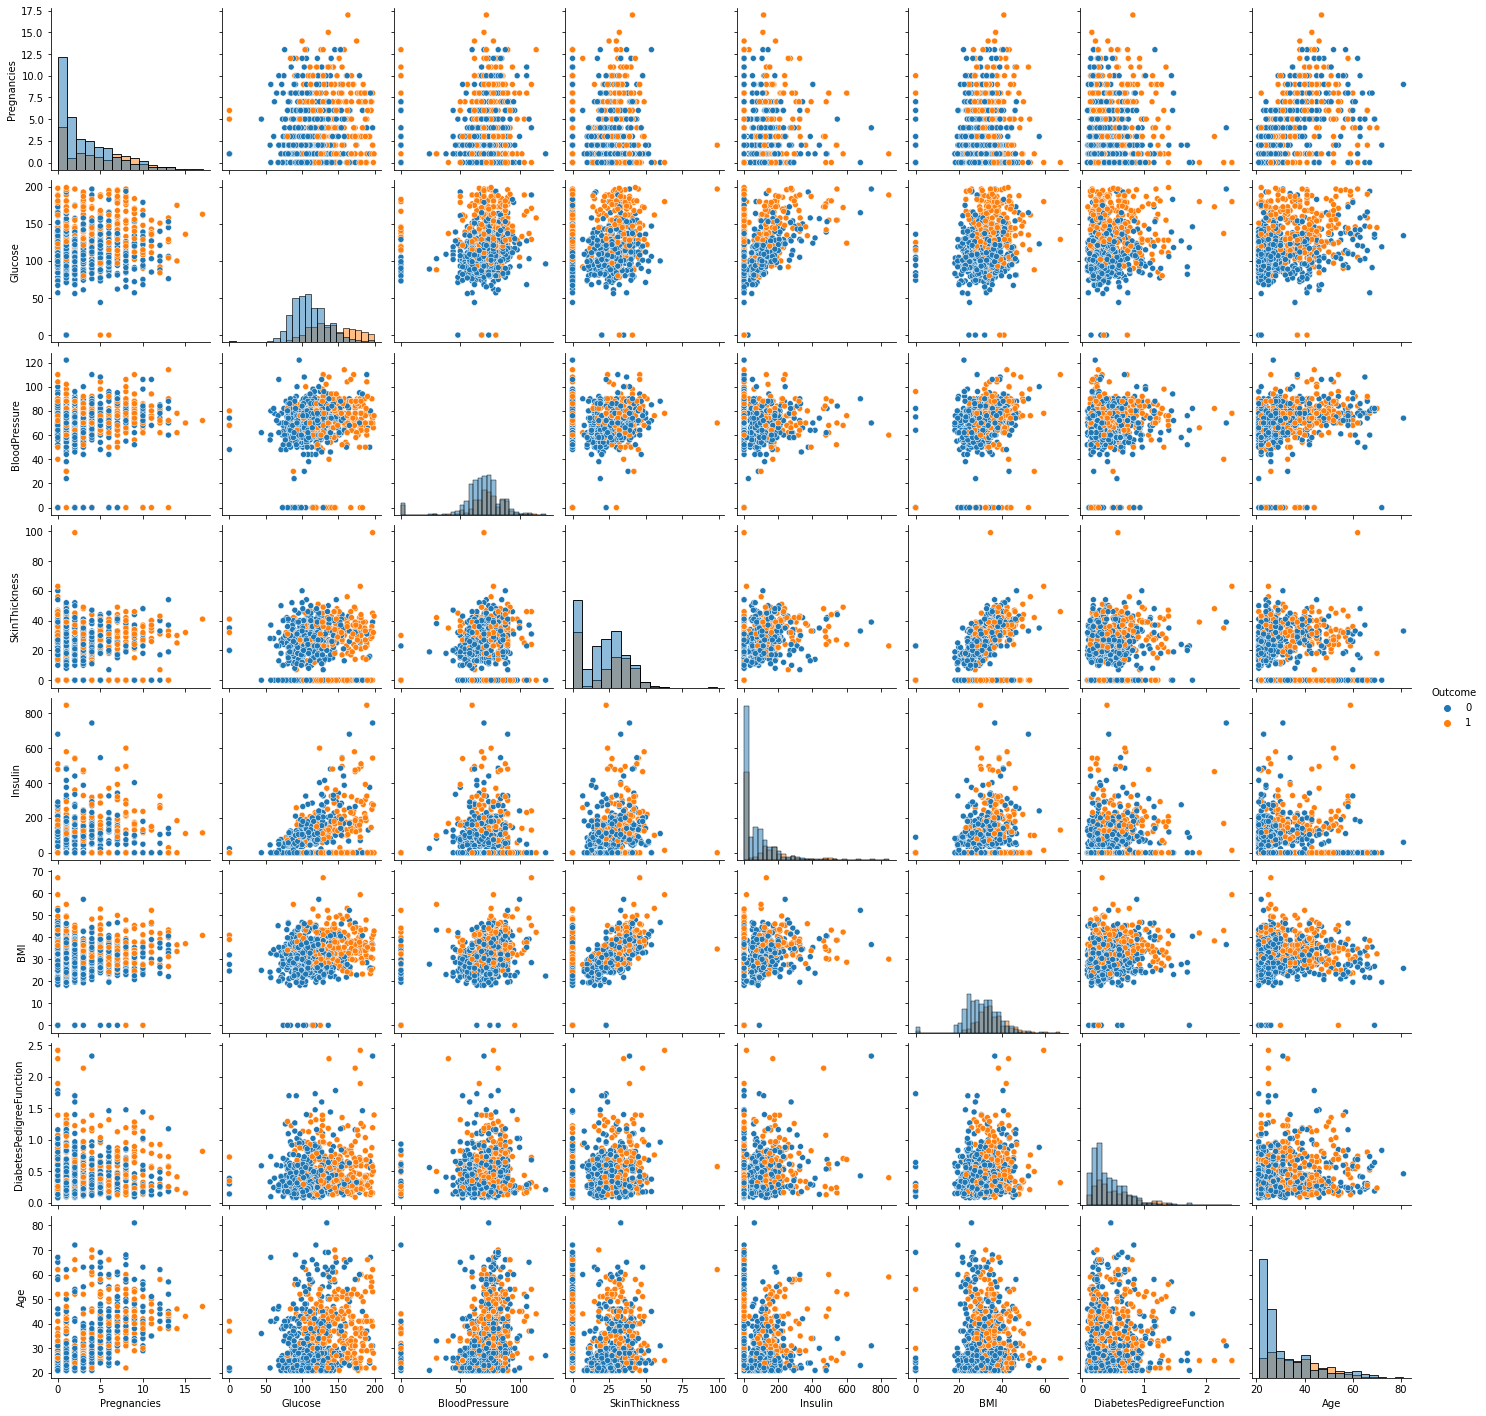

In [ ]:
#sns.pairplot(df.iloc[:,0:8])
sns.pairplot(df, hue = 'Outcome', diag_kind='hist')
plt.show()

In [ ]:
df.iloc[:,0:8].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [ ]:
clmn = list(df.columns)
for i in clmn:
    print(f'{i}: {sum(df[i] == 0)}')


Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


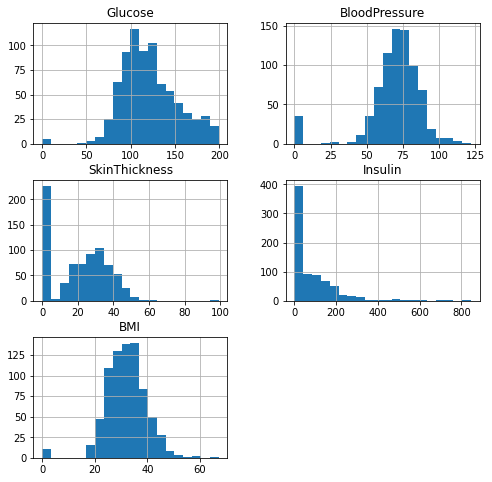

In [ ]:
df_hist = df.loc[:,['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']]
img = df_hist.hist(figsize = (8,8), bins=20)

Bayesian average

In [ ]:
df_wk = df[df['Insulin'] != 0]
sum_x = sum(df_wk['Insulin'])
Insulin_median_prior = np.median(df[df['Insulin'] != 0]['Insulin'])
print(Insulin_median_prior)
intn = len(df[df['Insulin'] != 0])
intC = 2000
Insulin_median_post = int((intC*Insulin_median_prior + sum_x)/(intC + intn))
print(Insulin_median_post)

df_wk = df[df['SkinThickness'] != 0]
sum_x = sum(df_wk['SkinThickness'])
SkinThickness_ave_prior = np.median(df[df['SkinThickness'] != 0]['SkinThickness'])
print(SkinThickness_ave_prior)
intn = len(df[df['SkinThickness'] != 0])
intC = 2000
SkinThickness_ave_post = int((intC*SkinThickness_ave_prior + sum_x)/(intC + intn))
print(SkinThickness_ave_post)

125.0
130
29.0
29


In [ ]:
len(df[df['SkinThickness'] != 0])

541

ゼロの置換え
分布によりmeanかmedianで代用するする

Pregnancies: 111
Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


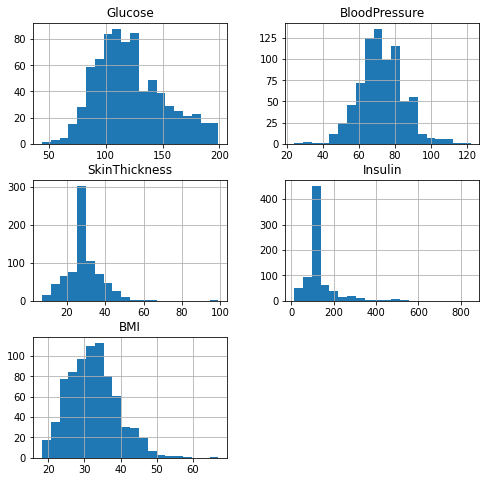

In [ ]:
Glucose_median = int(np.median(df[df['Glucose'] != 0]['Glucose']))
# Insulin_median = int(np.median(df[df['Insulin'] != 0]['Insulin']))
BloodPressure_ave = int(np.average(df[df['BloodPressure'] != 0]['BloodPressure']))
SkinThickness_ave = int(np.average(df[df['SkinThickness'] != 0]['SkinThickness']))
BMI_ave = np.average(df[df['BMI'] != 0]['BMI'])
# print(f'{Glucose_median}, {Insulin_median}, {BloodPressure_ave}, {SkinThickness_ave}, {BMI_ave}')

df['Glucose'] = df['Glucose'].replace(0, Glucose_median)
# df['Insulin'] = df['Insulin'].replace(0, Insulin_median)
df['BloodPressure'] = df['BloodPressure'].replace(0, BloodPressure_ave)
# df['SkinThickness'] = df['SkinThickness'].replace(0, SkinThickness_ave)
df['BMI'] = df['BMI'].replace(0.0, BMI_ave)

clmn = list(df.columns)
for i in clmn:
    print(f'{i}: {sum(df[i] == 0)}')

df_hist = df.loc[:,['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']]
img = df_hist.hist(figsize = (8,8), bins=20)

In [ ]:
X = np.array(df.iloc[:,0:8])
Y = np.array(df.iloc[:,8])

In [ ]:
# split data into train and test sets
seed = 27
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=df.columns[:-1])
# dtest = xgb.DMatrix(X_test, label=y_test, feature_names=df.columns[:-1])

# fit model on training data
model = XGBClassifier()
model.fit(X_train, y_train)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 75.20%


In [ ]:
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, eval_metric="error", eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.239583
[1]	validation_0-error:0.244792
[2]	validation_0-error:0.25
[3]	validation_0-error:0.286458
[4]	validation_0-error:0.265625
[5]	validation_0-error:0.265625
[6]	validation_0-error:0.270833
[7]	validation_0-error:0.28125
[8]	validation_0-error:0.28125
[9]	validation_0-error:0.276042
[10]	validation_0-error:0.276042
[11]	validation_0-error:0.270833
[12]	validation_0-error:0.270833
[13]	validation_0-error:0.276042
[14]	validation_0-error:0.270833
[15]	validation_0-error:0.270833
[16]	validation_0-error:0.270833
[17]	validation_0-error:0.270833
[18]	validation_0-error:0.260417
[19]	validation_0-error:0.260417
[20]	validation_0-error:0.260417
[21]	validation_0-error:0.255208
[22]	validation_0-error:0.25
[23]	validation_0-error:0.244792
[24]	validation_0-error:0.255208
[25]	validation_0-error:0.25
[26]	validation_0-error:0.255208
[27]	validation_0-error:0.244792
[28]	validation_0-error:0.25
[29]	validation_0-error:0.25
[30]	validation_0-error:0.244792
[31]	vali

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
X = np.array(df.iloc[:,0:8])
Y = np.array(df.iloc[:,8])

# split data into train and test sets
seed = 27
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

eval_set = [(X_test, y_test)]

# fit model on training data
model = XGBClassifier()
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-logloss:0.656895
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.627819
[2]	validation_0-logloss:0.603827
[3]	validation_0-logloss:0.584811
[4]	validation_0-logloss:0.571388
[5]	validation_0-logloss:0.557763
[6]	validation_0-logloss:0.547083
[7]	validation_0-logloss:0.537416
[8]	validation_0-logloss:0.528806
[9]	validation_0-logloss:0.521675
[10]	validation_0-logloss:0.516235
[11]	validation_0-logloss:0.510786
[12]	validation_0-logloss:0.505019
[13]	validation_0-logloss:0.500666
[14]	validation_0-logloss:0.494675
[15]	validation_0-logloss:0.491765
[16]	validation_0-logloss:0.487513
[17]	validation_0-logloss:0.485187
[18]	validation_0-logloss:0.483076
[19]	validation_0-logloss:0.479796
[20]	validation_0-logloss:0.476764
[21]	validation_0-logloss:0.474136
[22]	validation_0-logloss:0.470895
[23]	validation_0-logloss:0.468245
[24]	validation_0-logloss:0.466608
[25]	validation_0-logloss:0.4645
[26]	validation_0-logloss:0.462732

In [ ]:
def xgb_train(my_df):
    num = len(my_df.columns)-1
    X = np.array(my_df.iloc[:,0:num])
    Y = np.array(my_df.iloc[:,num])

    # split data into train and test sets
    seed = 27
    test_size = 0.33
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

    eval_set = [(X_test, y_test)]

    # fit model on training data
    model = XGBClassifier()
    eval_set = [(X_test, y_test)]
    model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)

    # make predictions for test data
    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]

    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))

    _, ax = plt.subplots(figsize=(12, 4))
    plot_importance(model, ax=ax,
                    importance_type='weight',
                    show_values=True)
    plt.show()


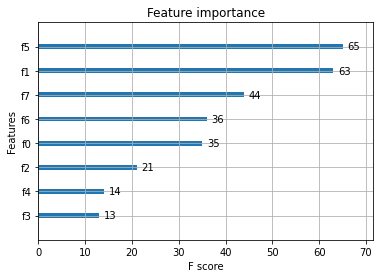

feature importances: [0.09542676 0.31995383 0.0778295  0.05952617 0.10418677 0.16032292
 0.07015692 0.11259716]


In [ ]:
from xgboost import plot_importance
from matplotlib import pyplot
plot_importance(model)
pyplot.show()

print('feature importances: {}'.format(model.feature_importances_))

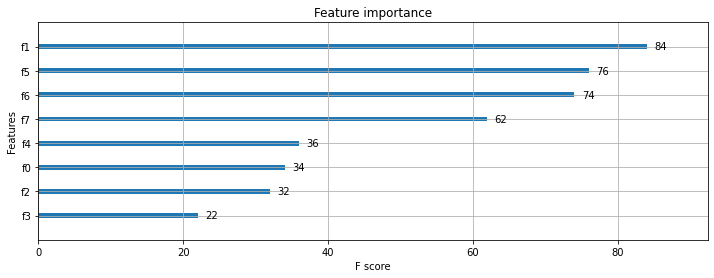

In [ ]:
from xgboost import plot_importance
# from matplotlib import pyplot
import matplotlib.pyplot as plt

_, ax = plt.subplots(figsize=(12, 4))
plot_importance(model, ax=ax,
                importance_type='weight',
                show_values=True)
plt.show()


In [ ]:
print(np.corrcoef(np.array(df['SkinThickness']), np.array(df['BMI'])))
print(np.corrcoef(np.array(df['Insulin']), np.array(df['BMI'])))

[[1.         0.54316229]
 [0.54316229 1.        ]]
[[1.         0.18016977]
 [0.18016977 1.        ]]


In [ ]:
df_copy = df.copy(deep = True)
df_copy = df_copy.drop('SkinThickness', axis=1)
df_copy.describe()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,140.671875,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,86.383060,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,125.000000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
xgb_train(df_copy)

###ゼロを削除

In [ ]:
df = pd.read_csv('diabetes.csv')
df = df.drop('SkinThickness', axis=1)
df.describe()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
arr = np.array(df.loc[:, ['Glucose', 'BloodPressure', 'Insulin', 'BMI']])
arr

array([[148. ,  72. ,   0. ,  33.6],
       [ 85. ,  66. ,   0. ,  26.6],
       [183. ,  64. ,   0. ,  23.3],
       ...,
       [121. ,  72. , 112. ,  26.2],
       [126. ,  60. ,   0. ,  30.1],
       [ 93. ,  70. ,   0. ,  30.4]])

In [ ]:
print(df_del.columns)
print(df.columns)
print(list(df.iloc[1]))

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
[1.0, 85.0, 66.0, 0.0, 26.6, 0.35100000000000003, 31.0, 0.0]


In [ ]:
def multiply_list(lst):
    result = 1
    for i in lst:
        result *= i
    return result

arr = np.array(df.loc[:, ['Glucose', 'BloodPressure', 'Insulin', 'BMI']])
df_del = pd.DataFrame(columns=df.columns)

# ゼロでなければ何らかの数値が入っている。
for i in range(len(arr)):
    if (multiply_list(arr[i]) != 0):
        print(list(df.iloc[i]))
        df_del = df_del.append(df.iloc[i])

print(len(df_del))
df_del.describe()

In [ ]:
sns.pairplot(df_del, hue = 'Outcome', diag_kind='hist')
plt.show()

[0]	validation_0-logloss:0.663054
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.638355
[2]	validation_0-logloss:0.619435
[3]	validation_0-logloss:0.604347
[4]	validation_0-logloss:0.593281
[5]	validation_0-logloss:0.575153
[6]	validation_0-logloss:0.564537
[7]	validation_0-logloss:0.550067
[8]	validation_0-logloss:0.546664
[9]	validation_0-logloss:0.537138
[10]	validation_0-logloss:0.534107
[11]	validation_0-logloss:0.528332
[12]	validation_0-logloss:0.528521
[13]	validation_0-logloss:0.52266
[14]	validation_0-logloss:0.522627
[15]	validation_0-logloss:0.521842
[16]	validation_0-logloss:0.516764
[17]	validation_0-logloss:0.517061
[18]	validation_0-logloss:0.515517
[19]	validation_0-logloss:0.514273
[20]	validation_0-logloss:0.513123
[21]	validation_0-logloss:0.515873
[22]	validation_0-logloss:0.513317
[23]	validation_0-logloss:0.511093
[24]	validation_0-logloss:0.512315
[25]	validation_0-logloss:0.513664
[26]	validation_0-logloss:0.51283

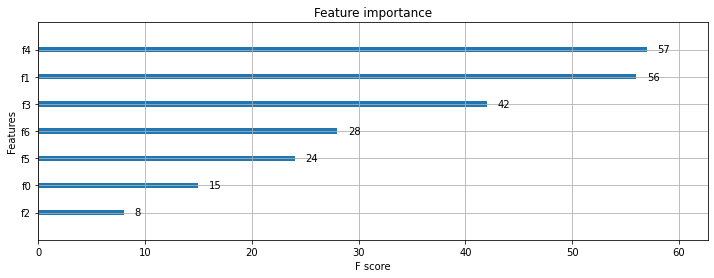

In [ ]:
xgb_train(df_del)

In [ ]:
# n_estimators = [50, 100, 150, 200]
# max_depth = [2, 4, 6, 8]
# param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)

n_estimators = [110] #list(range(90,120,5))  #[50, 100, 150, 200]
max_depth = [1]  #[2, 4, 6, 8]
learning_rate = [0.2]  # [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
min_child_weight = [1] #[1,2,3,4,5,6]
gamma = [0,0.1,0.2,0.3,0.4,0.5]

param_grid = dict(learning_rate=learning_rate,max_depth=max_depth, n_estimators=n_estimators, min_child_weight=min_child_weight,gamma=gamma)


# n_estimators = []
# subsample = []
# colsample_bytree = []
# colsample_bylevel = []
# param_grid = dict(learning_rate=learning_rate,max_depth=max_depth, n_estimators=n_estimators)

print(param_grid)

{'learning_rate': [0.2], 'max_depth': [1], 'n_estimators': [110], 'min_child_weight': [1], 'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5]}


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=27)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, Y)

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.474477 using {'gamma': 0, 'learning_rate': 0.2, 'max_depth': 1, 'min_child_weight': 1, 'n_estimators': 110}
-0.474477 (0.073531) with: {'gamma': 0, 'learning_rate': 0.2, 'max_depth': 1, 'min_child_weight': 1, 'n_estimators': 110}
-0.474477 (0.073531) with: {'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 1, 'min_child_weight': 1, 'n_estimators': 110}
-0.474477 (0.073531) with: {'gamma': 0.2, 'learning_rate': 0.2, 'max_depth': 1, 'min_child_weight': 1, 'n_estimators': 110}
-0.474477 (0.073531) with: {'gamma': 0.3, 'learning_rate': 0.2, 'max_depth': 1, 'min_child_weight': 1, 'n_estimators': 110}
-0.474477 (0.073531) with: {'gamma': 0.4, 'learning_rate': 0.2, 'max_depth': 1, 'min_child_weight': 1, 'n_estimators': 110}
-0.474477 (0.073531) with: {'gamma': 0.5, 'learning_rate': 0.2, 'max_depth': 1, 'min_child_weight': 1, 'n_estimators': 110}


In [ ]:
# fit model on training data
# Best: -0.472060 using {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}
model = XGBClassifier(
        learning_rate =0.2,
        n_estimators=110,
        max_depth=1)

        # min_child_weight=1,
        # gamma=0,
        # subsample=0.8,
        # colsample_bytree=0.8,
        # objective= 'binary:logistic',
        # nthread=4,
        # scale_pos_weight=1,
        # seed=27)

eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

##Breast Cancer dataset
   1. Class: no-recurrence-events, recurrence-events
   2. age: 10-19, 20-29, 30-39, 40-49, 50-59, 60-69, 70-79, 80-89, 90-99.
   3. menopause: lt40, ge40, premeno.
   4. tumor-size: 0-4, 5-9, 10-14, 15-19, 20-24, 25-29, 30-34, 35-39, 40-44, 45-49, 50-54, 55-59.
   5. inv-nodes: 0-2, 3-5, 6-8, 9-11, 12-14, 15-17, 18-20, 21-23, 24-2, 27-29, 30-32, 33-35, 36-39.
   6. node-caps: yes, no.
   7. deg-malig: 1, 2, 3.
   8. breast: left, right.
   9. breast-quad: left-up, left-low, right-up,	right-low, central.
   10. irradiat:	yes, no.

[Class, age, menopause, tumor-size, inv-nodes, node-caps, deg-malig, breast, breast-quad, irradiat]


In [ ]:
# multiclass classification
import pandas as pd
import numpy as np
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
import re

In [ ]:
clmn = ['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiat', 'Class']
df = pd.read_csv('breast-cancer_2.csv', names=clmn)
print(df.info())
print(df.tail())
df.to_csv('breast-cancer.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          286 non-null    object
 1   menopause    286 non-null    object
 2   tumor-size   286 non-null    object
 3   inv-nodes    286 non-null    object
 4   node-caps    278 non-null    object
 5   deg-malig    286 non-null    int64 
 6   breast       286 non-null    object
 7   breast-quad  285 non-null    object
 8   irradiat     286 non-null    object
 9   Class        286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB
None
       age menopause tumor-size  ... breast-quad irradiat                 Class
281  50-59      ge40      30-34  ...    left_low       no  no-recurrence-events
282  50-59   premeno      25-29  ...    left_low      yes  no-recurrence-events
283  30-39   premeno      30-34  ...    right_up       no  no-recurrence-events
284  50-59   premeno      1

In [ ]:
print(df['tumor-size'].unique())

print(df['node-caps'].unique())
print(df['breast-quad'].unique())
lst = list(df.iloc[:,i].unique() for i in range(10))
print(lst)

['15-19' '35-39' '30-34' '25-29' '40-44' '10-14' '0-4' '20-24' '45-49'
 '50-54' '5-9']
['yes' 'no']
['left_up' 'central' 'left_low' 'right_up' 'right_low']
[array(['40-49', '50-59', '60-69', '30-39', '70-79', '20-29'], dtype=object), array(['premeno', 'ge40', 'lt40'], dtype=object), array(['15-19', '35-39', '30-34', '25-29', '40-44', '10-14', '0-4',
       '20-24', '45-49', '50-54', '5-9'], dtype=object), array(['0-2', '3-5', '15-17', '6-8', '9-11', '24-26', '12-14'],
      dtype=object), array(['yes', 'no'], dtype=object), array([3, 1, 2]), array(['right', 'left'], dtype=object), array(['left_up', 'central', 'left_low', 'right_up', 'right_low'],
      dtype=object), array(['no', 'yes'], dtype=object), array(['recurrence-events', 'no-recurrence-events'], dtype=object)]


In [ ]:
# とりあえずnanを含む行を削除
# df = df[df.isnull().any(axis=1) != True]
df = df.dropna(how='any')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          277 non-null    object
 1   menopause    277 non-null    object
 2   tumor-size   277 non-null    object
 3   inv-nodes    277 non-null    object
 4   node-caps    277 non-null    object
 5   deg-malig    277 non-null    int64 
 6   breast       277 non-null    object
 7   breast-quad  277 non-null    object
 8   irradiat     277 non-null    object
 9   Class        277 non-null    object
dtypes: int64(1), object(9)
memory usage: 23.8+ KB
None


In [ ]:
df = df.replace({'tumor-size': {"^0-4$": "00-04", "^5-9$": "05-09"}}, regex=True)
print(df.loc[:10, 'tumor-size'])
df = df.replace({'inv-nodes': {"^0-2$": "00-02", "^3-5$": "03-05", \
                               "^6-8$": "06-08", "^9-11$": "09-11"}}, regex=True)
# df = df.replace({'tumor-size': {"^'0-4'$": "'00-04'", "^'5-9'$": "'05-09'"}}, regex=True)
# df = df.replace({'inv-nodes': {"^'0-2'$": "'00-02'", "^'3-5'$": "'03-05'", \
#                                "^'6-8'$": "'06-08'", "^'9-11'$": "'09-11'"}}, regex=True)
print(df.loc[:10, 'inv-nodes'])

X = np.array(df.iloc[:,0:9])
X = X.astype(str)
df_str = df.astype(str)
Y = np.array(df.iloc[:,9])

0     15-19
1     15-19
2     35-39
3     35-39
4     30-34
5     25-29
6     40-44
7     10-14
8     00-04
9     40-44
10    25-29
Name: tumor-size, dtype: object
0     00-02
1     00-02
2     00-02
3     00-02
4     03-05
5     03-05
6     00-02
7     00-02
8     00-02
9     15-17
10    00-02
Name: inv-nodes, dtype: object


In [ ]:
# 説明変数をLaberEncode(OrdinalEncode)し、続けてindex=[1,4,6,7,8]はOneHotEncodeする。
no_order = [1,4,6,7,8]
encoded_x = None
for i in range(0, X.shape[1]):
    label_encoder = LabelEncoder()
    feature = label_encoder.fit_transform(X[:,i])

    # どのデータがどの整数に変換されたか表示
    labels = list(df_str.iloc[:,i].unique())
    print(f"Origin: {labels}")
    labels = label_encoder.transform(labels)
    print(f"Encode: {labels}")

    feature = feature.reshape(X.shape[0], 1)
    if i in no_order:
        onehot_encoder = OneHotEncoder(sparse=False, categories='auto')
        feature = onehot_encoder.fit_transform(feature)

    if encoded_x is None:
        encoded_x = feature
    else:
        encoded_x = np.concatenate((encoded_x, feature), axis=1)
print("X shape: : ", encoded_x.shape)

label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(Y)
label_encoded_y = label_encoder.transform(Y)

Origin: ['40-49', '50-59', '60-69', '30-39', '70-79', '20-29']
Encode: [2 3 4 1 5 0]
Origin: ['premeno', 'ge40', 'lt40']
Encode: [2 0 1]
Origin: ['15-19', '35-39', '30-34', '25-29', '40-44', '10-14', '00-04', '20-24', '45-49', '50-54', '05-09']
Encode: [ 3  7  6  5  8  2  0  4  9 10  1]
Origin: ['00-02', '03-05', '15-17', '06-08', '09-11', '24-26', '12-14']
Encode: [0 1 5 2 3 6 4]
Origin: ['yes', 'no', 'nan']
Encode: [2 1 0]
Origin: ['3', '1', '2']
Encode: [2 0 1]
Origin: ['right', 'left']
Encode: [1 0]
Origin: ['left_up', 'central', 'left_low', 'right_up', 'right_low', 'nan']
Encode: [2 0 1 5 4 3]
Origin: ['no', 'yes']
Encode: [0 1]
X shape: :  (286, 20)


In [ ]:
encoded_x[:,17]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
ordinal_encoder = OrdinalEncoder()
# arr = np.array(df[['age', 'menopause']])   #.reshape(1, -1)
ordinal_encoded_values = ordinal_encoder.fit_transform(X)
print(ordinal_encoded_values)
print(ordinal_encoded_values[:,4])

In [ ]:
encoded_x = None
for i in range(0, X.shape[1]):
    label_encoder = LabelEncoder()
    feature = label_encoder.fit_transform(X[:,i])

    # どのデータがどの整数に変換されたか表示
    labels = list(df_str.iloc[:,i].unique())
    print(f"Origin: {labels}")
    labels = label_encoder.transform(labels)
    print(f"Encode: {labels}")

    feature = feature.reshape(X.shape[0], 1)
    # onehot_encoder = OneHotEncoder(sparse=False, categories='auto')
    # feature = onehot_encoder.fit_transform(feature)
    if encoded_x is None:
        encoded_x = feature
    else:
        encoded_x = np.concatenate((encoded_x, feature), axis=1)
print("X shape: : ", encoded_x.shape)

label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(Y)
label_encoded_y = label_encoder.transform(Y)

Origin: ['40-49', '50-59', '60-69', '30-39', '70-79', '20-29']
Encode: [2 3 4 1 5 0]
Origin: ['premeno', 'ge40', 'lt40']
Encode: [2 0 1]
Origin: ['15-19', '35-39', '30-34', '25-29', '40-44', '10-14', '00-04', '20-24', '45-49', '50-54', '05-09']
Encode: [ 3  7  6  5  8  2  0  4  9 10  1]
Origin: ['00-02', '03-05', '15-17', '06-08', '09-11', '24-26', '12-14']
Encode: [0 1 5 2 3 6 4]
Origin: ['yes', 'no']
Encode: [1 0]
Origin: ['3', '1', '2']
Encode: [2 0 1]
Origin: ['right', 'left']
Encode: [1 0]
Origin: ['left_up', 'central', 'left_low', 'right_up', 'right_low']
Encode: [2 0 1 4 3]
Origin: ['no', 'yes']
Encode: [0 1]
X shape: :  (277, 9)


[0]	validation_0-logloss:0.667606
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.645219
[2]	validation_0-logloss:0.628573
[3]	validation_0-logloss:0.613742
[4]	validation_0-logloss:0.603086
[5]	validation_0-logloss:0.595302
[6]	validation_0-logloss:0.587984
[7]	validation_0-logloss:0.581675
[8]	validation_0-logloss:0.576915
[9]	validation_0-logloss:0.569315
[10]	validation_0-logloss:0.5665
[11]	validation_0-logloss:0.560161
[12]	validation_0-logloss:0.556946
[13]	validation_0-logloss:0.554903
[14]	validation_0-logloss:0.552811
[15]	validation_0-logloss:0.551927
[16]	validation_0-logloss:0.551055
[17]	validation_0-logloss:0.550809
[18]	validation_0-logloss:0.550706
[19]	validation_0-logloss:0.550261
[20]	validation_0-logloss:0.55092
[21]	validation_0-logloss:0.551835
[22]	validation_0-logloss:0.552078
[23]	validation_0-logloss:0.553304
[24]	validation_0-logloss:0.554589
[25]	validation_0-logloss:0.554527
[26]	validation_0-logloss:0.557549


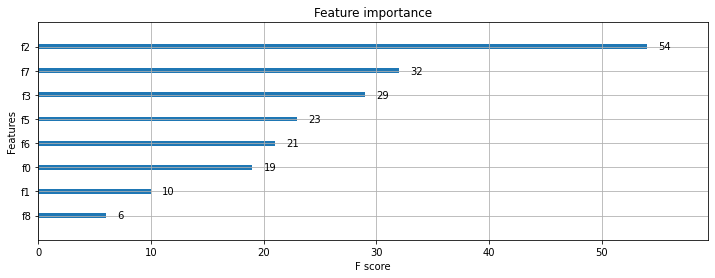

In [ ]:
def xgb_train(X, Y):
    # split data into train and test sets
    seed = 27
    test_size = 0.33
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

    eval_set = [(X_test, y_test)]

    # fit model on training data
    model = XGBClassifier()
    eval_set = [(X_test, y_test)]
    model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)

    # make predictions for test data
    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]

    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))

    _, ax = plt.subplots(figsize=(12, 4))
    plot_importance(model, ax=ax,
                    importance_type='weight',
                    show_values=True)
    plt.show()

xgb_train(encoded_x, label_encoded_y)

###sklearn前処理のEncorder
複数featureに対応できるか否かの違いだけみたい。

　OrdinalEncoder：複数 2d array

　LabelEncoder：単数 1d array

渡すのは当然str型　先頭からの文字のasciiコードの大小で数値化しているみたい。

In [ ]:
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

# create a new OrdinalEncoder object
ordinal_encoder = OrdinalEncoder()
label_encoder = LabelEncoder()

# define a list of values to be encoded
values = [['Male', 'Female', 'Female', 'Male', 'Male', 'Female'],
          ['US', 'JP', 'US', 'CA', 'US', 'AZ'],
          ['5', '0', '15', '10', '0', '5'],
          ['A', 'C', 'B', 'A', 'C', 'B']]

        #   ['Doctor', 'Lawyer', 'Engineer', 'Doctor', 'Lawyer', 'Engineer'],
        #   ['10-14', '0-4', '15-19', '10-14', '0-4', '5-10'],
arr1 = np.array(values).T
arr2 = ['5', '0', '15', '10', '0', '5']

# encode the values
ordinal_encoded_values = ordinal_encoder.fit_transform(arr1)
label_encoded_values = label_encoder.fit_transform(arr2)

# print the encoded values
print(ordinal_encoded_values)
print(label_encoded_values)

[[1. 3. 3. 0.]
 [0. 2. 0. 2.]
 [0. 3. 2. 1.]
 [1. 1. 1. 0.]
 [1. 3. 0. 2.]
 [0. 0. 3. 1.]]
[3 0 2 1 0 3]


###Bayesian average
S = score of the candy bar

R = average of user ratings for the candy bar

C = average of user ratings for all candy bars

w = weight assigned to R and computed as v/(v+m), where v is the number of user ratings for that candy bar, and m is average number of reviews for all candy bars.

In [ ]:
def bayesian_average(df):
    """given a dataframe, returns a series of bayesian averages"""
    R = df.mean(axis=1)
    C = df.sum(axis=1).sum() / df.count(axis=1).sum()
    w = df.count(axis=1) / (df.count(axis=1) + (df.count(axis=1).sum() / \
                                    len(df.dropna(how='all', inplace=False))))
    return ((w * R) + ((1 - w)*C))

other_df['bayesian_avg'] = bayesian_average(ratings_df)

https://www.youtube.com/watch?v=GrJP9FLV3FE&t=1165s

値の入っていない（?,NAN, ' '）データはゼロに置き換える。
こういったデータがないゼロと数値としてのゼロをXGBoostは識別できるので問題ない。
missingがあまりに多いとXGBoostでもhandle出来ないので他の対策が必要
len(df.loc[df['aaa']]== ' '])
df.loc[(df['aaa']]== ' '), 'aaa'] = 0

テキストが期待されていない説明変数はdtypeがnumericでなければならない
df.dtypeでテキストはobject、数値はint, float, booleanであること。
df['aaa'] = pd.to_numeric(df['aaa'])




テキスト中のブランクは＿に置き換える（Tree描画のため）




やっぱりONE-HOT-encoderのほうがいいみたい。
X_encorded = pd.get_dummies(X, columns=['aaa', 'bbb', ...])



docによると、imballancedデータの場合ACU(scoring=roc_auc)で評価し、scal_pos_weightパラメータで調整する。


ちょうせいにしようしたのは
max_depth[3,4,5], lr[0.1,0.01,0.05], gamma[0, 0.25, 1.0], reg_lamda[0, 1.0, 10.0], scal_pos_weight[1,3,5]


XGBClassifier(..., subsample=0.9, colsample_bytree=0.5)
全データの90%を使用し、全説明変数の50%を使用する（overfitとスピード向上）